In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [16]:
def create_grouped_barplot(
    df, embedding_col='Embedding', 
    value_cols=['Batch correction', 'Bio conservation', 'Total'], 
    figsize=(12, 4), colors=['#8884d8', '#82ca9d', '#ffc658'],
    title='scIB Comparison by Embeddings'):
    
    """
    Create a grouped bar plot comparing different metrics across embedding types.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing the data
    embedding_col : str
        Name of the column containing embedding types
    value_cols : list
        List of column names to plot
    figsize : tuple
        Figure size (width, height)
    colors : list
        List of colors for the bars
    title : str
        Title for the figure
    """
    # Create a copy of the dataframe to avoid modifying the original
    plot_df = df.copy()
    
    # Convert numeric columns from string to float
    for col in value_cols:
        plot_df[col] = pd.to_numeric(plot_df[col], errors='coerce')
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Set the positions for the bars
    x = np.arange(len(plot_df[embedding_col]))
    width = 0.25  # Width of the bars
    
    # Create bars for each metric
    for i, (col, color) in enumerate(zip(value_cols, colors)):
        offset = width * (i - 1)  # Center the groups
        ax.bar(x + offset, plot_df[col], width, label=col, color=color)
    
    # Customize the plot
    ax.set_ylabel('Value')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(plot_df[embedding_col], rotation=15, ha='right')
    ax.legend(loc='best', ncol=3)
    
    # Add grid for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Remove top and right spines
    sns.despine()
    
    # Format y-axis to show fewer decimal places
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return fig

In [21]:
df = pd.read_csv("../res/scIB/kidney_hvg5k.csv").iloc[:-1,:]
df

,Embedding,Isolated labels,Leiden NMI,Leiden ARI,KMeans NMI,KMeans ARI,Silhouette label,cLISI,Silhouette batch,iLISI,KBET,Graph connectivity,PCR comparison,Batch correction,Bio conservation,Total
0,Harmony,0.43838525,0.6486253134434985,0.37748370140900733,0.540851349975338,0.20569825332607108,0.43989453092217445,0.9955216464349779,0.8323417,0.016390248880547992,0.4487771586901865,0.6769935730643378,0.6069002102693688,0.5162805723788862,0.5209228633850388,0.5190659469825778
1,Scanorama,0.5020781,0.6526434838436889,0.29491653330005074,0.5832385096422237,0.24986614564455162,0.44681335985660553,0.9993142879615395,0.88447267,0.00802935382067147,0.4356004099171552,0.40766360632435983,0,0.34715320764662316,0.5326957765983934,0.45847874901768526
2,X_bbknn,0.562972,0.5953679135946268,0.22955528582268028,0.5965318462724798,0.2364135189221862,0.38509463518857956,0.9878853094779839,0.50134706,0.031787714715731344,0.3190993888555868,0.4794991698148722,0,0.26634666767162285,0.5134029312086448,0.414580425793836
3,X_pca,0.5137155,0.6703912093664646,0.3044218063081959,0.6162719622909013,0.2561202964702038,0.4641733430325985,0.9994640875670869,0.86325336,0.005191173593876726,0.3624848552981776,0.7446715240300139,0.0,0.39512018158966267,0.5463654586622038,0.4858673478331873
4,X_scVI,0.5296601,0.7580639911965344,0.5278044632579967,0.6572495871799787,0.3005792092381154,0.5090366415679455,0.9992591971057957,0.8602918,0.009463253667799093,0.38557973861929856,0.8419133958234218,0.3783908492498373,0.49512780328032935,0.611664742178804,0.5650499666194142
5,X_scVI_DoubleBatch,0.5331781,0.7486162765556952,0.5066869617796624,0.6758594041407109,0.3272658042614307,0.5098927607759833,0.9993485596220372,0.8644918,0.009124016357680498,0.3909946209167494,0.8464727283398513,0.3647078486751835,0.4951582069249706,0.6144068368835305,0.5667073849001065
6,X_tsne,0.30351114,0.6200057438144039,0.2229039199212503,0.5710613662578949,0.21591165212381766,0.32002800703048706,0.9979602159079859,0.54252815,0.008320900343232235,0.30870849986383486,0.40675498443355623,0,0.25326250742128875,0.4644831496837932,0.3799948927787914
7,X_umap,0.67352986,0.5768597498480692,0.21942541743187394,0.563211790678535,0.21673139054111965,0.31919535994529724,0.9928070084523346,0.56651765,0.0144550840733415,0.3057706359966802,0.39080153493610925,0,0.25550898121744325,0.5088229400363963,0.4074973565088151
8,scPoli,0.60330915,0.8065562499208075,0.6832247354559321,0.7662992256726116,0.5088165797276629,0.5431267321109772,0.9991189403049017,0.56880385,0.03244433160555565,0.600938624088993,0.7949237456894334,0.6010033150624773,0.5196227726565098,0.7014930882433416,0.6287449620086089


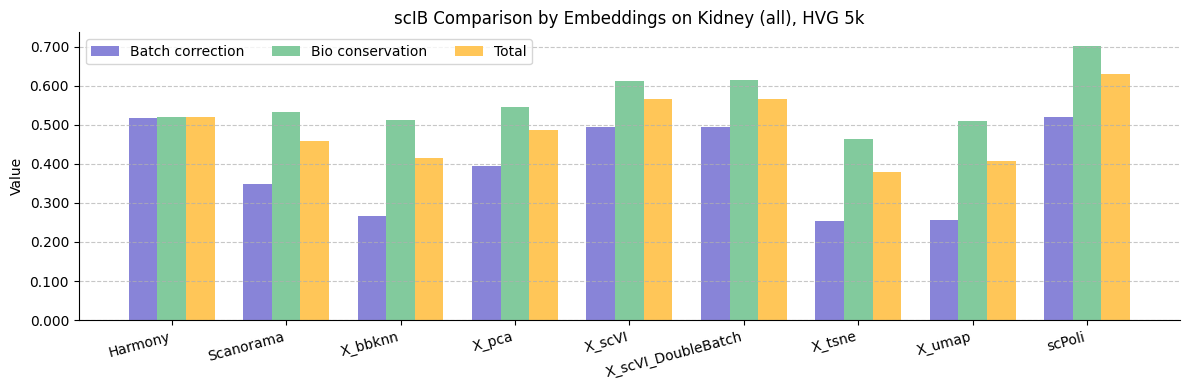

In [22]:
fig = create_grouped_barplot(df=df, title='scIB Comparison by Embeddings on Kidney (all), HVG 5k')
plt.show()

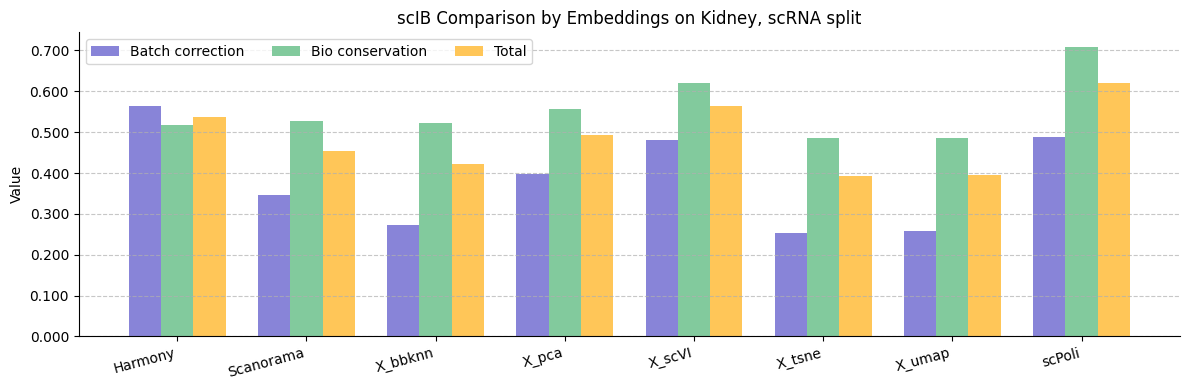

In [30]:
df = pd.read_csv("../res/scIB/kidney_hvg5k_sc.csv").iloc[:-1,:]

fig = create_grouped_barplot(
    df=df.iloc[[0,2,4,5,7,9,10,11], :], 
    title='scIB Comparison by Embeddings on Kidney, scRNA split')
plt.show()

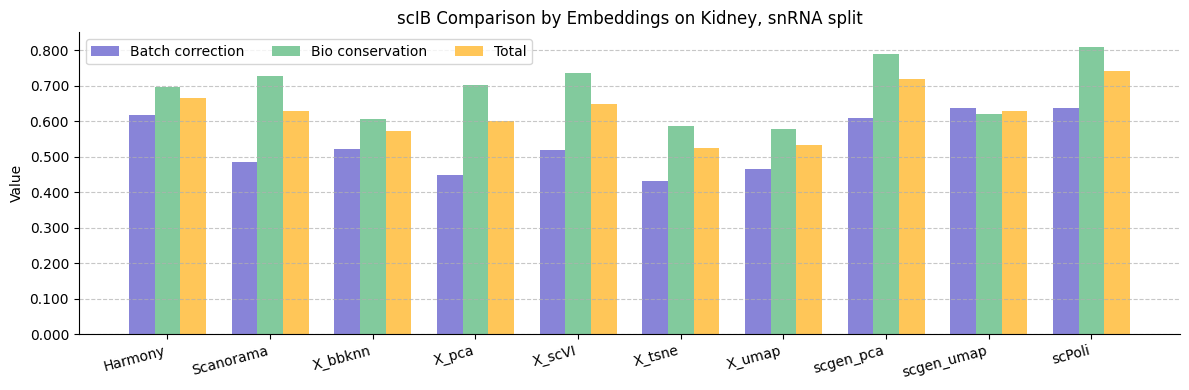

In [20]:
df = pd.read_csv("../res/scIB/kidney_hvg5k_sn.csv").iloc[:-1,:]

fig = create_grouped_barplot(df=df, title='scIB Comparison by Embeddings on Kidney, snRNA split')
plt.show()